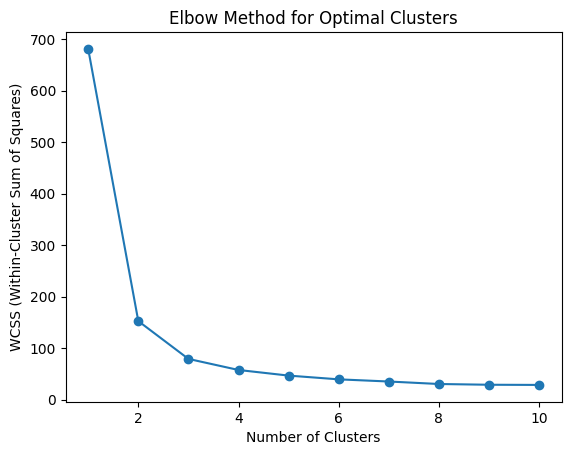

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   
5            5.4           3.9            1.7           0.4  Iris-setosa   
6            4.6           3.4            1.4           0.3  Iris-setosa   
7            5.0           3.4            1.5           0.2  Iris-setosa   
8            4.4           2.9            1.4           0.2  Iris-setosa   
9            4.9           3.1            1.5           0.1  Iris-setosa   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  
9        1  


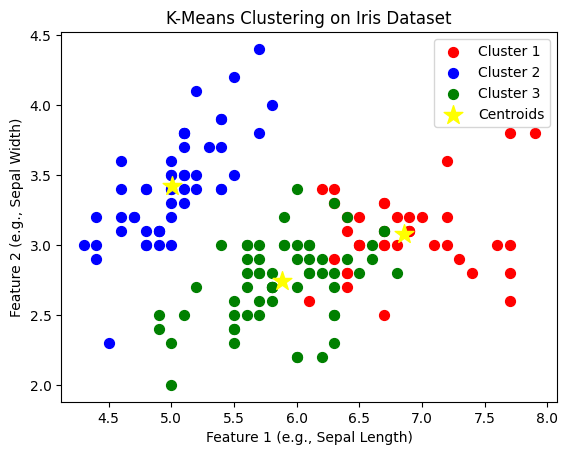

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("D:/College/BE/CL-1/ML Codes and Datasets/ML/Iris.csv")

# Drop 'Id' column (not needed for clustering)
df = df.drop(columns=['Id'])

# Features for clustering (Sepal & Petal length/width)
X = df.iloc[:, [0, 1, 2, 3]].values

# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):  # Testing cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

# From the elbow graph, we usually pick k=3 for Iris dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster results to dataframe
df['Cluster'] = y_kmeans

# Show first 10 results
print(df.head(10))

# Scatter plot (using only 2 features for visualization)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', marker='*', label='Centroids')

plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Feature 1 (e.g., Sepal Length)")
plt.ylabel("Feature 2 (e.g., Sepal Width)")
plt.legend()
plt.show()
